## Practica :
Generar un modelo que me permita simular el uso de recursos de los hospitales por cada una de las provincias, para ello obtener la informacion revisada en la practica de investigacion y tomar como ejemplo la practica de simulacion de atencion de paciente del COVID revisada en clase. Lo que se busca es poder generar graficos de uso de recursos:

- Costos (Generar un aproximacion de cuanto se invierte para atender a un paciente con COVID)
- Personal (Aproximacion del uso del personal por paciente, o el hospital)
- Camas
- Equipos/Insumos medicos (Obtener una aproximacion del uso de equipos medicos)
- Pacientes (Informacion obtenida desde el ministerio de salud - validar con el porcentual del tipo de paciente [ninio 10%, adulto 30%, riesgo 60%]) - Hospitalizacion 80%, Otros 20%


Para ello deberan generar un modelo lo mas cercano a la realidad, y con ayuda de la estadistica descriptiva ajustar los valores. Es importante tener como datos de entrada el dia y el numero de pacientes.

Finalmente validar el modelo con lo la realidad del pais (Investigar en  base al tema el uso de los recursos publicos )


**Las islas Galápagos son más conocidas por su biodiversidad, pero también es el hogar de unas 30.000 personas. --> Esta en semaforo rojo**

*Hospitales que atienden casos de coronavirus en Ecuador* 
<br>
Galápagos: Hospital Oskar Jandal
<br>
camas --> 20 camas

5 respiratorios mecanicos 

3 Cuidados intensivos

consultorios = 64

20 especialistas

21 medicos generales

26 enfermeras

4 auxiliares

8 laboratorio

**Por paciente**

5 personal

-------
Contagiados 71

Inversion 2.3 millones para salud

 **Costos(riesgo) **
$7000

 **Costos(medio) **
$4000


Referencia
http://www.teleamazonas.com/etiqueta/galapagos-hospital-oskar-jandl/
https://www.salud.gob.ec/hospital-oskar-jandl-de-galapagos-recibio-oficialmente-la-acreditacion-internacional/
https://www.planv.com.ec/historias/sociedad/duras-cifras-del-sistema-salud-ecuatoriano-ante-el-coronavirus-hay-1183-camas

###  Tasa de crecimiento

In [1]:
import pandas as pd
import numpy as np


url = 'galapagos.xlsx'
df = pd.read_excel(url)
df = df.replace(np.nan, 0)
df=df[df['Provincia']=="Galápagos"]
filtro = df.iloc[0].loc['19/3/2020':]
tc = int(filtro.mean())
print(tc)

14


Simulacion COVID-19 en Hospital Oskar Jandal  
Llega paciente, con numero:  0  en tiempo  0
Llega paciente, con numero:  1  en tiempo  0
Llega paciente, con numero:  2  en tiempo  0
Llega paciente, con numero:  3  en tiempo  0
Llega paciente, con numero:  4  en tiempo  0
Llega paciente, con numero:  5  en tiempo  0
Llega paciente, con numero:  6  en tiempo  0
Llega paciente, con numero:  7  en tiempo  0
Llega paciente, con numero:  8  en tiempo  0
Llega paciente, con numero:  9  en tiempo  0
Llega paciente, con numero:  10  en tiempo  0
Llega paciente, con numero:  11  en tiempo  0
Llega paciente, con numero:  12  en tiempo  0
Llega paciente, con numero:  13  en tiempo  0
Llega paciente, con numero:  14  en tiempo  0
Llega paciente, con numero:  15  en tiempo  0
Llega paciente, con numero:  16  en tiempo  0
Llega paciente, con numero:  17  en tiempo  0
Llega paciente, con numero:  18  en tiempo  0
Llega paciente, con numero:  19  en tiempo  0
Llega paciente, con numero:  20  en tiempo 

Llega paciente, con numero:  237  en tiempo  12
Llega paciente, con numero:  238  en tiempo  12
Llega paciente, con numero:  239  en tiempo  12
Llega paciente, con numero:  240  en tiempo  12
Llega paciente, con numero:  241  en tiempo  12
%%%%%%%%%Paciente Nº 216  espero  1  días y fallece por falta de camas
%%%%%%%%%Paciente Nº 217  espero  1  días y fallece por falta de camas
%%%%%%%%%Paciente Nº 220  espero  1  días y fallece por falta de camas
%%%%%%%%%Paciente Nº 221  espero  1  días y fallece por falta de camas
%%%%%%%%%Paciente Nº 225  espero  1  días y fallece por falta de camas
%%%%%%%%%Paciente Nº 228  espero  0  días y fallece por falta de camas
%%%%%%%%%Paciente Nº 229  espero  0  días y fallece por falta de camas
%%%%%%%%%Paciente Nº 230  espero  0  días y fallece por falta de camas
%%%%%%%%%Paciente Nº 231  espero  0  días y fallece por falta de camas
%%%%%%%%%Paciente Nº 234  espero  0  días y fallece por falta de camas
%%%%%%%%%Paciente Nº 236  espero  0  días y fallec

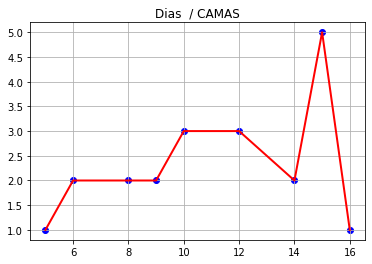

PERSONAL TOTAL {11: 1, 15: 2, 16: 2, 17: 1, 18: 1, 19: 1}


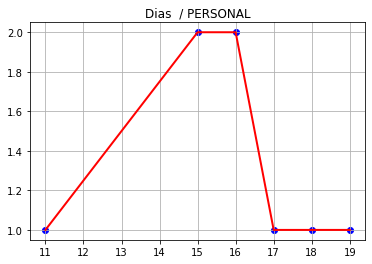

Total Cuidados Intensivos {15: 1, 16: 1, 17: 1}


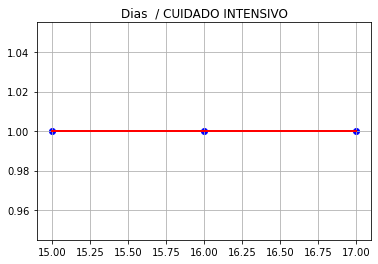

RESPIRADORES TOTAL {}


ValueError: not enough values to unpack (expected 2, got 0)

In [3]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

#PARAMETROS
HOSPITALES = 1
CAMAS = 20
RESPIRADORES=5
UCI=5
PERSONAL=79

COSTO_BAJO=4000
COSTO_DIA_BAJO=int(COSTO_BAJO/15) 

COSTO_ALTO=7000
COSTO_DIA_ALTO=int(COSTO_ALTO/21)


INFECTADOS= 73
TASA_CRECIMIENTO = tc
DIAS_INTERNADO = 10
DIAS_SIMULACION = 20

costoTotal=[]
personalTotal={}
camasTotal={}
respiradoresTotal={}
UCITotal={}
niños={}
adultos={}
atendidos={}
riesgo={}


persona_recuperadas={}
persona_fallecidas={}


class Hospital(object):

    def __init__(self, env,num_cama,name,num_personal,num_uci, num_respiradores):
            self.env = env
            self.num_cama = num_cama
            self.num_personal = num_personal
            self.num_uci=num_uci
            self.num_respiradores=num_respiradores
            self.camas = simpy.Resource(env, num_cama)
            self.personal = simpy.Resource(env, num_personal)
            self.uci = simpy.Resource(env, num_uci)
            self.respiradores = simpy.Resource(env, num_respiradores)
            self.name = name
        
    def hospitalizacion(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        print("EL paciente, con numero:", paciente, "salió de la hospitalización en el día ", int(self.env.now))
        
    def atencion(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        print("El paciente, con numero:", paciente, "terminó la asistencia medica en la hospitalización el día ", int(self.env.now))
        
    def cuidado_intensivo(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-3, DIAS_INTERNADO+11))
        print("El paciente, con numero:", paciente, "salió de la sala de intensivos en el día ", int(self.env.now))
    
    def respiradores_tiempo(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-3, DIAS_INTERNADO+11))
        print("El paciente, con numero:", paciente, "ya deja de usar respiradores en el día ", int(self.env.now),'por muerte.')
        
    
def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    estado = random.randint(1,100)
    if (estado < 80) :
        tipo = random.randint(1,100)
        if (tipo < 10) :
            niños[env.now] = niños[env.now] + 1 if env.now in niños else 1        
        elif(tipo < 30 and tipo>10) :
            adultos[env.now] = adultos[env.now] + 1 if env.now in adultos else 1 
        elif (tipo > 60) :
            riesgo[env.now] = riesgo[env.now] + 1 if env.now in riesgo else 1 

        with hospital.camas.request() as cama:
            llegadaC = env.now
            dias_esperando = random.randint(0,1) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
            requerimientoC = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
            wait = env.now - llegadaC
            if cama in requerimientoC:
                print("Paciente Nº", paciente, " se le asigna una cama ")
                yield env.process(hospital.hospitalizacion(paciente))
                estado = random.randint(1,100)
                camasTotal[env.now] = camasTotal[env.now] + 1 if env.now in camasTotal else 1 
                atendidos[env.now] = atendidos[env.now]+ 1 if env.now in atendidos else 1

                if (estado < 8) :
                    persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1       

            ##ASIGNAR PERSONAL
                with hospital.personal.request() as personal:
                    llegadaP = env.now
                    dias_esperando = random.randint(0,1) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoP = yield personal | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    waitP = env.now - llegadaP
                if personal in requerimientoP:
                    print("Paciente Nº", paciente, " se le asigna personal medico ")
                    yield env.process(hospital.atencion(paciente))
                    estado = random.randint(1,100)
                    personalTotal[env.now] = personalTotal[env.now] + 1 if env.now in personalTotal else 1 
                    if (estado < 6) :
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                    else:
                        persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1
            #######
                    acceso = random.randint(1,100)
                    if(acceso<28):
                        #######UCI
                        with hospital.uci.request() as uci:
                            llegadaU = env.now
                            dias_esperando = random.randint(9,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                            requerimientoU = yield uci | env.timeout(dias_esperando) #Asignar un tiempo de espera
                            waitU = env.now - llegadaU
                            if uci in requerimientoU:
                                print("Paciente Nº", paciente, " pasa a la UCI ")
                                UCITotal[env.now] = UCITotal[env.now] + 1 if env.now in UCITotal else 1        
                                yield env.process(hospital.cuidado_intensivo(paciente))
                                estado = random.randint(1,100)
                                if (estado < 8) :
                                    persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                else:
                                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1
                            #######RES
                                requiere = random.randint(1,100)
                                if(requiere<95):
                                    with hospital.respiradores.request() as respiradores:
                                        llegadaR = env.now
                                        requerimientoR = yield respiradores | env.timeout(0) #Asignar un tiempo de espera
                                        waitR = env.now - llegadaR
                                        if respiradores in requerimientoR:
                                            print("Paciente Nº", paciente, "se le asigna un respirador ")
                                            respiradoresTotal[env.now] = respiradoresTotal[env.now] + 1 if env.now in  respiradoresTotal else 1
                                            yield env.process(hospital.respiradores_tiempo(paciente))
                                            estado = random.randint(1,100)
                                            if (estado < 8) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            else:
                                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1
                                        else:
                                            print("%%%%%%Paciente Nº" , paciente," espero ", waitR , " días y fallece por falta de acceso a la sala UCI")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                    #######
                            else:
                                print("%%%%%%Paciente Nº" , paciente," espero ", waitU , " días y fallece por falta de acceso a la UCI")
                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                        #######
                    else:
                        print("El Paciente Nº" , paciente," espero ", waitP , " y se recuperó.")
            else:
                print("%%%%%%%%%Paciente Nº" , paciente," espero ", wait , " días y fallece por falta de camas")
                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1


def ejecutar(env, tasa_crecimiento, infectados):
    hospital = Hospital(env, CAMAS, "",PERSONAL,UCI,RESPIRADORES)
    for i in range(infectados):
        asignar_hospital(env, hospital, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospital, paciente)
                
def asignar_hospital(env, hospital, paciente):
    hosp_esc = 1
    if (hosp_esc == 1):
        print("Llega paciente, con numero: ", paciente, " en tiempo ", env.now)
        env.process(llegada_paciente(env, hospital, paciente))

print("Simulacion COVID-19 en Hospital Oskar Jandal  ")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO,INFECTADOS))
env.run(until=DIAS_SIMULACION)


#CAMAS
print('CAMAS TOTAL',camasTotal)
datos=sorted(camasTotal.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='r') 
pp.scatter(x,y,color='b')
pp.title("Dias  / CAMAS")
pp.grid(True)
pp.show() 

#Personal
print('PERSONAL TOTAL',personalTotal)
datos=sorted(personalTotal.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='r') 
pp.scatter(x,y,color='b')
pp.title("Dias  / PERSONAL")
pp.grid(True)
pp.show() 

#Sala de Intensivos
print('Total Cuidados Intensivos',UCITotal)
datos=sorted(UCITotal.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='r') 
pp.scatter(x,y,color='b')
pp.title("Dias  / CUIDADO INTENSIVO")
pp.grid(True)
pp.show() 

#RESPIRADORES
print('RESPIRADORES TOTAL',respiradoresTotal)
datos=sorted(respiradoresTotal.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='r') 
pp.scatter(x,y,color='b')
pp.title("Dias  / RESPIRADORES")
pp.grid(True)
pp.show() 

#NIÑOS
print('NIÑOS TOTAL',niños)
datos=sorted(niños.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='r') 
pp.scatter(x,y,color='b')
pp.title("Dias  / NIÑOS")
pp.grid(True)
pp.show() 

#ADULTOS
print('ADULTOS TOTAL',adultos)
datos=sorted(adultos.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='r')  
pp.scatter(x,y,color='b')
pp.title("Dias  / ADULTOS")
pp.grid(True)
pp.show() 

#RIESGO
print('RIESGO TOTAL',riesgo)
datos=sorted(riesgo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='r') 
pp.scatter(x,y,color='b')
pp.title("Dias  / RIESGO")
pp.grid(True)
pp.show() 

#COSTO
print('COSTO TOTAL',atendidos)
datos=sorted(atendidos.items())
x, y =zip(*datos)
Y=[]
for i in range(len(y)):
    costoB=(int(y[i]*COSTO_DIA_BAJO))
    Y.append(costoB)
pp.plot(x,Y,linewidth=2,color='r') 
pp.scatter(x,Y,color='b')
pp.title("Dias  /Total de costo de un paciente con bajo riesgo")
pp.grid(True)
pp.show() 

print('COSTOS Cuidados Intensivos TOTAL',respiradoresTotal)
datos=sorted(respiradoresTotal.items())
x, y =zip(*datos)

Y=[]
for i in range(len(y)):
    costoA=(int(y[i]*COSTO_DIA_ALTO))
    Y.append(costoA)
pp.plot(x,Y,linewidth=2,color='r') 
pp.scatter(x,Y,color='b')
pp.title("Dias  / Total de costo de un paciento de alto riesgo")
pp.grid(True)
pp.show() 


## Conclusiones
Desde mi punto de vista, es notorio que la tasa de crecimiento no es muy alta, sin embargo, puesto que es una provincia de poco habitantes, además que no pueda con la estructura necesario para atender pacientes COVID, es preocupante esta tasa de crecimiento, por la falta de recursos y dinero que existe dentro de la Provincia. En la simulación se puede observar cuanto cuesta atender un paciente y lo mucho que tiene que esperar muchas de las veces para poder ser hospitalizado, si sigue creciente, es posible que hospital colapse y ya no sea posible atender pacientes. Pese que la simulación no presenta datos certeros por la falta de información, tiene cierto apego con lo que ocurre realmente. 

## Recomendaciones
Fuese oportuno que la provincia, publique datos actualizados sobre el personal, paciente, camas, etc. Con el fin de que tanta universidad, empresas, puedan realizar este tipo de simulaciones lo cual sería un gran aporte, para obtener datos más precisos sobre la tasa de crecimiento, numero de contagiados, camas usadas, etc. Pues con esta información se podría hacer una inversión en salió mas acertada en cada provincia. 


## Opiniones
Considero que somo un país, que no estuvo ni esta un preparado para enfrentar este tipo de pandemias es por ello que la mayoría de las provincias no cuenta con lo necesario para atender pacientes COVID, aún más si hablamos de Galápagos, considerando que en la normalidad todo tiene mayor precio en esta provincia, entender casos de COVID, no ha sido la excepción, ya que supera los 4000, atender a un paciente que no esté en gravedad. También, es una Isla, que no tiene los recursos necesarios, según la investigación realizada, cuenta con poco personal, pocas camas, por lo cual Galápagos está en semáforo rojo.

**Garay Largo Lucy Marisol**